In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data 
data = pd.read_csv("supply_chain_data.csv")

In [3]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


#### Here we can see maximum and minimun price of products. Maximum price of product is 99.1713 and minimum price is 1.699. 
#### Maximum revenue generated is 9866.465 and minimum revenue generated is 1061.618.
#### Maximum cost of product is 997.413 and minimum cost is 103.916

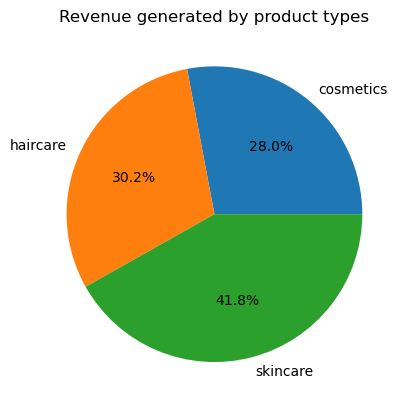

In [9]:
data1 = data.groupby('Product type').sum().reset_index()
fig, ax = plt.subplots()
ax.pie("Revenue generated", labels="Product type", data = data1,autopct='%1.1f%%')
plt.title("Revenue generated by product types")
plt.show()

#### Revenue generated by skincare products is maximum i.e. 41.8%, 30.2% by haircare products and 28% by cosmetics.

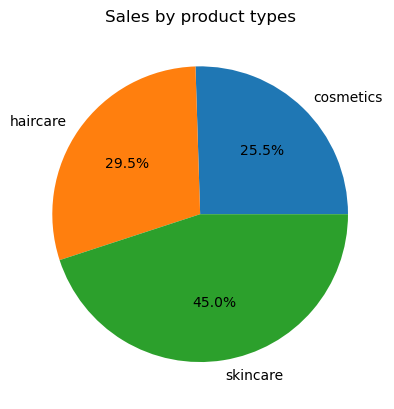

In [12]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
fig, ax = plt.subplots()
ax.pie("Number of products sold", labels="Product type", data = sales_data,autopct='%1.1f%%')
plt.title("Sales by product types")
plt.show()

#### skincare products are sold in more than other to products, so maximum sales are done by skincare products.
####  45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

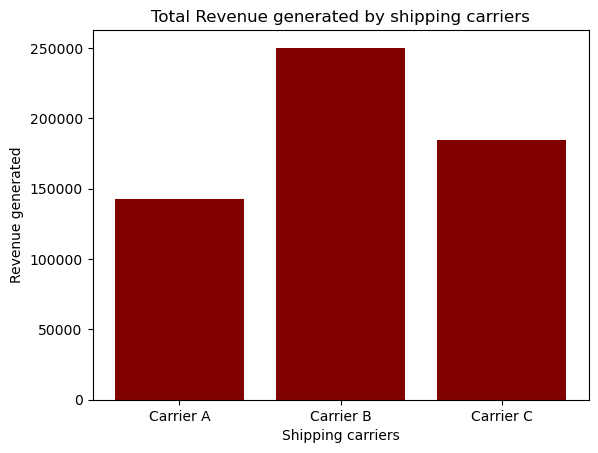

In [19]:
# let’s have a look at the total revenue generated from shipping carriers
data2 = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.bar("Shipping carriers", "Revenue generated", data = data2, color ='maroon')
 
plt.xlabel("Shipping carriers")
plt.ylabel("Revenue generated")
plt.title("Total Revenue generated by shipping carriers")
plt.show()

####  the company is using three carriers for transportation, and Carrier B helps the company in generating more revenue.

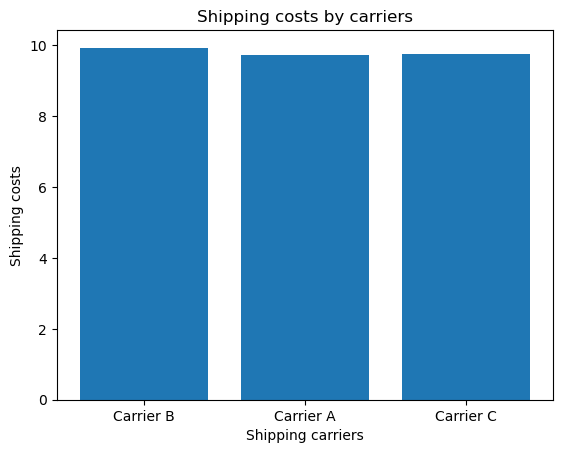

In [35]:
plt.bar("Shipping carriers", "Shipping costs", data = data)
plt.xlabel("Shipping carriers")
plt.ylabel("Shipping costs")
plt.title("Shipping costs by carriers")
plt.show()

#### In above graph we discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three.

<AxesSubplot:xlabel='Transportation modes', ylabel='Costs'>

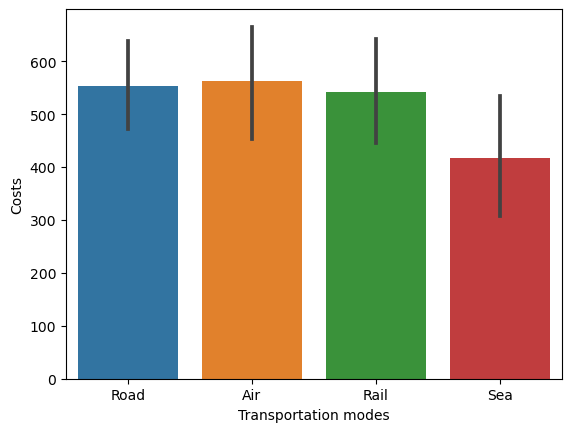

In [36]:
sns.barplot(data=data, x="Transportation modes", y="Costs")

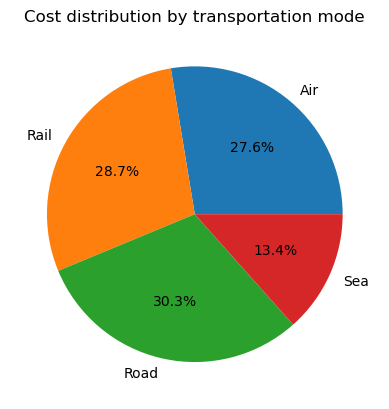

In [42]:
data3 = data.groupby("Transportation modes")["Costs"].sum().reset_index()
fig, ax = plt.subplots()
ax.pie("Costs", labels="Transportation modes", data = data3, autopct='%1.1f%%')
plt.title("Cost distribution by transportation mode")
plt.show()

#### The company spends more on Road and Rail modes of transportation for the transportation of Goods.

[Text(0.5, 1.0, 'Average defect rate by product  type')]

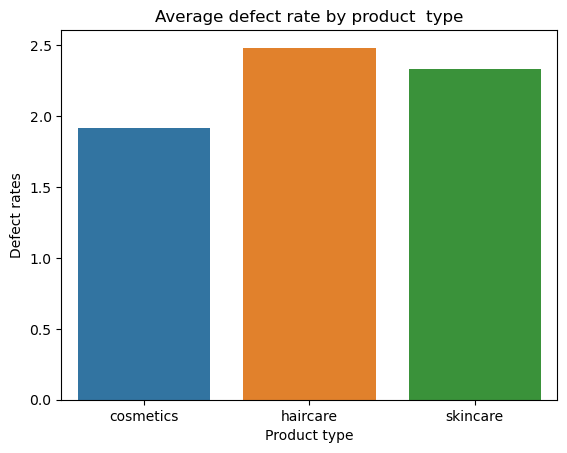

In [49]:
# Lets look at the average defect rate of all product types
data4 = data.groupby("Product type")["Defect rates"].mean().reset_index()
sns.barplot(data = data4, x = "Product type", y = "Defect rates").set(title = "Average defect rate by product  type")


#### The defect rate of haircare product is high.